In [187]:
import numpy as np
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('bank-subscribed_19.csv')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [188]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no


In [189]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
8036,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
8037,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
8038,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
8039,32,services,married,secondary,no,109,yes,no,NaN,2,jun,364,13.0,-1.0,0.0,NaN,no
8040,35,housemaid,single,tertiary,no,608,yes,yes,NaN,2,jun,227,NaN,NaN,NaN,NaN,NaN


In [190]:
df.shape

(8041, 17)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8041 non-null   int64  
 1   job        8019 non-null   object 
 2   marital    8041 non-null   object 
 3   education  7664 non-null   object 
 4   default    8041 non-null   object 
 5   balance    8041 non-null   int64  
 6   housing    8041 non-null   object 
 7   loan       8041 non-null   object 
 8   contact    0 non-null      float64
 9   day        8041 non-null   int64  
 10  month      8041 non-null   object 
 11  duration   8041 non-null   int64  
 12  campaign   8040 non-null   float64
 13  pdays      8040 non-null   float64
 14  previous   8040 non-null   float64
 15  poutcome   0 non-null      float64
 16  Target     8040 non-null   object 
dtypes: float64(5), int64(4), object(8)
memory usage: 1.0+ MB


In [192]:
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact      float64
day            int64
month         object
duration       int64
campaign     float64
pdays        float64
previous     float64
poutcome     float64
Target        object
dtype: object

In [193]:
df.job.value_counts()

blue-collar      2662
technician       1263
management       1208
admin.            987
services          912
entrepreneur      239
retired           225
self-employed     195
unemployed        166
student            85
housemaid          77
Name: job, dtype: int64

In [194]:
df_obj_col=df.columns[df.dtypes=='object'].tolist()
for obj_col in df_obj_col:
    df[obj_col]=df[obj_col].astype('category')
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact       float64
day             int64
month        category
duration        int64
campaign      float64
pdays         float64
previous      float64
poutcome      float64
Target       category
dtype: object

In [195]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


## Comment: The date holds the same data type.

# Section 1b.) Handle missing (Nan) values 

In [196]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no


In [197]:
df.isnull().sum()

age             0
job            22
marital         0
education     377
default         0
balance         0
housing         0
loan            0
contact      8041
day             0
month           0
duration        0
campaign        1
pdays           1
previous        1
poutcome     8041
Target          1
dtype: int64

In [198]:
df.describe()

,age,balance,contact,day,duration,campaign,pdays,previous,poutcome
count,8041.000000,8041.000000,0.0,8041.000000,8041.000000,8040.000000,8040.0,8040.0,0.0
mean,39.446835,1012.994901,NaN,17.554409,264.993160,2.538557,-1.0,0.0,NaN
std,9.244936,2470.228317,NaN,8.285143,249.772337,2.850901,0.0,0.0,NaN
min,20.000000,-3372.000000,NaN,2.000000,0.000000,1.000000,-1.0,0.0,NaN
25%,32.000000,40.000000,NaN,9.000000,118.000000,1.000000,-1.0,0.0,NaN
50%,38.000000,323.000000,NaN,16.000000,193.000000,2.000000,-1.0,0.0,NaN
75%,46.000000,1026.000000,NaN,26.000000,322.000000,3.000000,-1.0,0.0,NaN
max,61.000000,58544.000000,NaN,30.000000,3366.000000,63.000000,-1.0,0.0,NaN


In [199]:
# Specifying columns that are numerical with Nan values
numerical_columns = ['balance', 'duration', 'campaign', 'pdays', 'previous']

# Removing rows with Nan values in the specified numerical columns
df.dropna(subset=numerical_columns, inplace=True)

In [200]:
df.isnull().sum()

age             0
job            22
marital         0
education     377
default         0
balance         0
housing         0
loan            0
contact      8040
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8040
Target          0
dtype: int64

In [201]:
df['education'].value_counts()

secondary    4641
tertiary     1573
primary      1449
Name: education, dtype: int64

In [202]:
df['job'].value_counts()

blue-collar      2662
technician       1263
management       1208
admin.            987
services          912
entrepreneur      239
retired           225
self-employed     195
unemployed        166
student            85
housemaid          76
Name: job, dtype: int64

In [203]:
# Filling in NaN values with a specific value
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['job'].fillna(df['job'].mode()[0], inplace=True)

In [204]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact      8040
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8040
Target          0
dtype: int64

In [205]:
df.drop(['contact', 'poutcome'], axis=1,inplace=True)

In [206]:
Categorical=df.columns[df.dtypes=="category"].to_list()
Categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'Target']

In [207]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'Target'],
      dtype='object')

### Comments: Nan values have been removed using appropriate method

# SECTION 2a.) Duplicate handling

In [208]:
# Check for Duplicates
df.duplicated().sum

# Display duplicates
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target


### Communts: There are no duplication values in the dataset.

# SECTION 2b.) Outlier Detection

In [209]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.0,8040.0
mean,39.447388,1013.045274,17.556343,264.997886,2.538557,-1.0,0.0
std,9.245378,2470.377822,8.283841,249.787512,2.850901,0.0,0.0
min,20.000000,-3372.000000,2.000000,0.000000,1.000000,-1.0,0.0
25%,32.000000,40.000000,9.000000,118.000000,1.000000,-1.0,0.0
50%,38.000000,323.000000,16.000000,193.000000,2.000000,-1.0,0.0
75%,46.000000,1026.000000,26.000000,322.000000,3.000000,-1.0,0.0
max,61.000000,58544.000000,30.000000,3366.000000,63.000000,-1.0,0.0


<Axes: xlabel='age'>

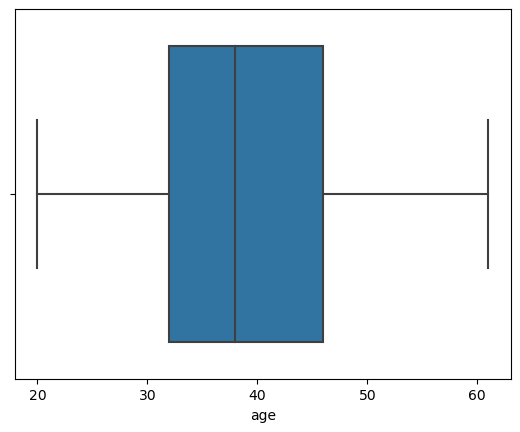

In [210]:
sns.boxplot(data=df,x=df['age'])

<Axes: xlabel='balance'>

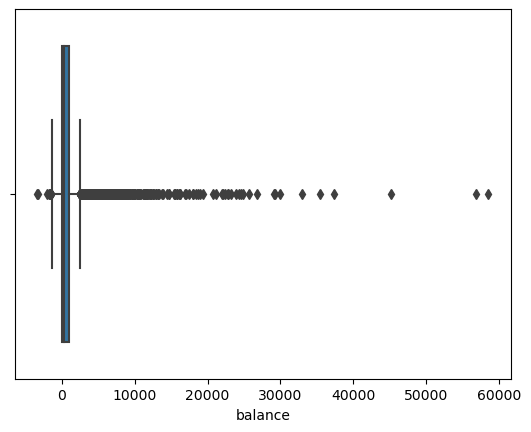

In [211]:
sns.boxplot(data=df,x=df['balance'])

In [212]:
q1=np.quantile(df['balance'],0.25)
q3=np.quantile(df['balance'],0.75)
IQR=q3-q1

print("The First quartile is", q1)
print("The Third quartile is", q3)
print("The Interquartilerange is", IQR)

The First quartile is 40.0
The Third quartile is 1026.0
The Interquartilerange is 986.0


In [213]:
lower_limit=q1-(1.5*IQR)
upper_limit=q3+(1.5*IQR)

print("lower limit is", lower_limit, "\n Upper limit is", upper_limit)
print("Minimum value is", df['balance'].min(), "\n Maximum value is", df['balance'].max())

lower limit is -1439.0 
 Upper limit is 2505.0
Minimum value is -3372 
 Maximum value is 58544


In [214]:
# Applying limits to update instances of the outiers in category balance
df['balance']=np.where(df['balance'] < lower_limit, lower_limit, df['balance'])
df['balance']=np.where(df['balance'] > upper_limit, upper_limit, df['balance'])

<Axes: xlabel='balance'>

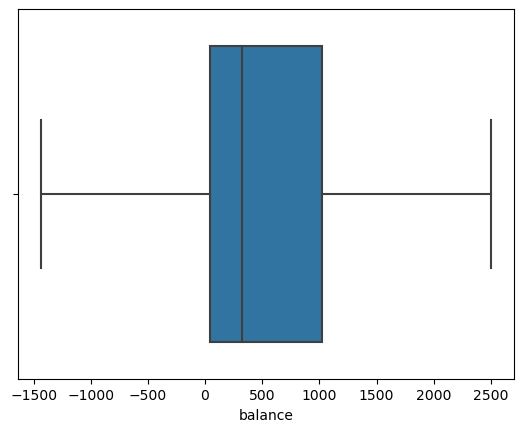

In [215]:
sns.boxplot(data=df,x=df['balance'])

<Axes: xlabel='day'>

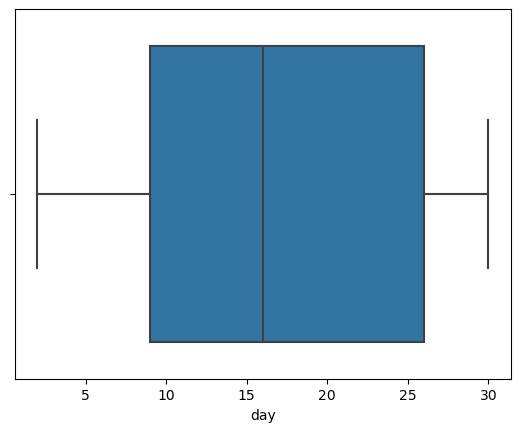

In [216]:
sns.boxplot(data=df,x=df['day'])

<Axes: xlabel='duration'>

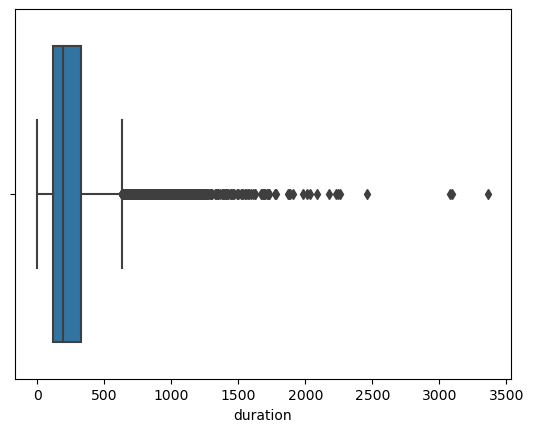

In [217]:
sns.boxplot(data=df, x=df['duration'])

In [218]:
q1=np.quantile(df['duration'],0.25)
q3=np.quantile(df['duration'],0.75)
IQR=q3-q1

In [219]:
print("The First quartile is", q1)
print("The Third quartile is", q3)
print("The Interquartilerange is", IQR)

The First quartile is 118.0
The Third quartile is 322.0
The Interquartilerange is 204.0


In [220]:
lower_limit=q1-(1.5+IQR)
upper_limit=q3-(1.5+IQR)

print("lower_limit is", lower_limit,"\n Upper limit is", upper_limit)
print("Minimum value is", df['duration'].min(),"\n Maximum value is", df['duration'].max())

lower_limit is -87.5 
 Upper limit is 116.5
Minimum value is 0 
 Maximum value is 3366


In [221]:
# applying limites to update instances of the outliers in category balance
df['duration']=np.where(df['duration'] < lower_limit, lower_limit,df['duration'])
df['duration']=np.where(df['duration'] > upper_limit, upper_limit,df['duration'])

<Axes: xlabel='campaign'>

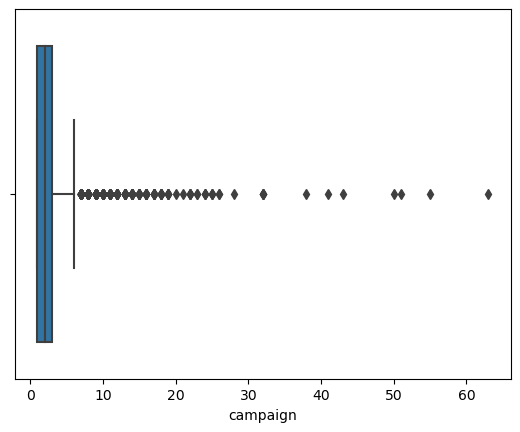

In [222]:
sns.boxplot(data=df, x=df['campaign'])

In [223]:
q1=np.quantile(df['campaign'],0.25)
q3=np.quantile(df['campaign'],0.75)
IQR=q3-q1

print("The First quartile is", q1)
print("The Third quartile is", q3)
print("The Interquartilerange is", IQR)

The First quartile is 1.0
The Third quartile is 3.0
The Interquartilerange is 2.0


In [224]:
lower_limit=q1-(1.5*IQR)
upper_limit=q3+(1.5*IQR)
print("lower limit is",lower_limit,"\n Upper limit is", upper_limit)
print("Minimum value is", df['campaign'].min(),"\n Maximum value is",df['campaign'].max())

lower limit is -2.0 
 Upper limit is 6.0
Minimum value is 1.0 
 Maximum value is 63.0


In [225]:
# Apply limits to update instances of the outliers in category balance
df['campaign']=np.where(df['campaign'] < lower_limit,lower_limit,df['campaign'])
df['campaign']=np.where(df['campaign'] > upper_limit,upper_limit,df['campaign'])

<Axes: ylabel='pdays'>

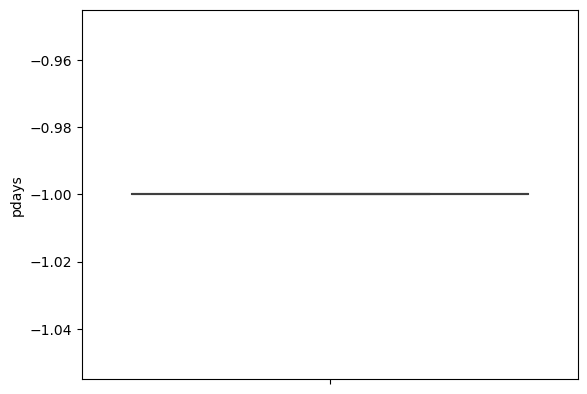

In [226]:
sns.boxplot(data=df,y=df['pdays'])

<Axes: ylabel='previous'>

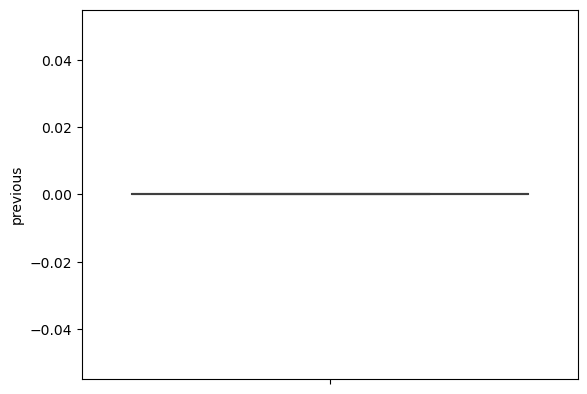

In [227]:
sns.boxplot(data=df,y=df['previous'])

# Comments: Balance, duration and campaign plots have outliers, which are data point that outside the "whiskers" of the plot.

# SECTION 2c: Countplot

In [228]:
Categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'Target']

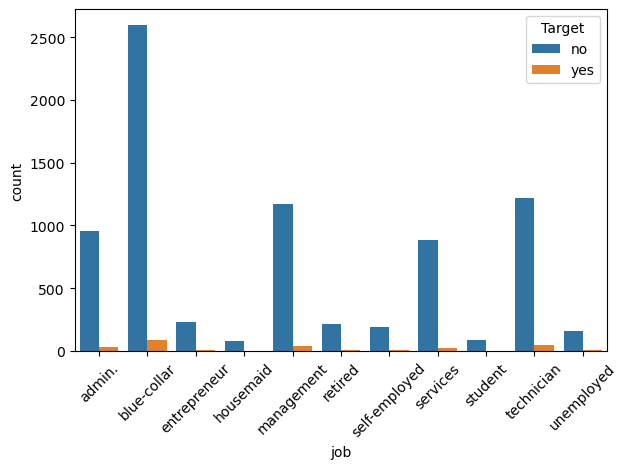

In [229]:
plt.figure()
chart = sns.countplot(data=df,x=df['job'],hue='Target')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.tight_layout()

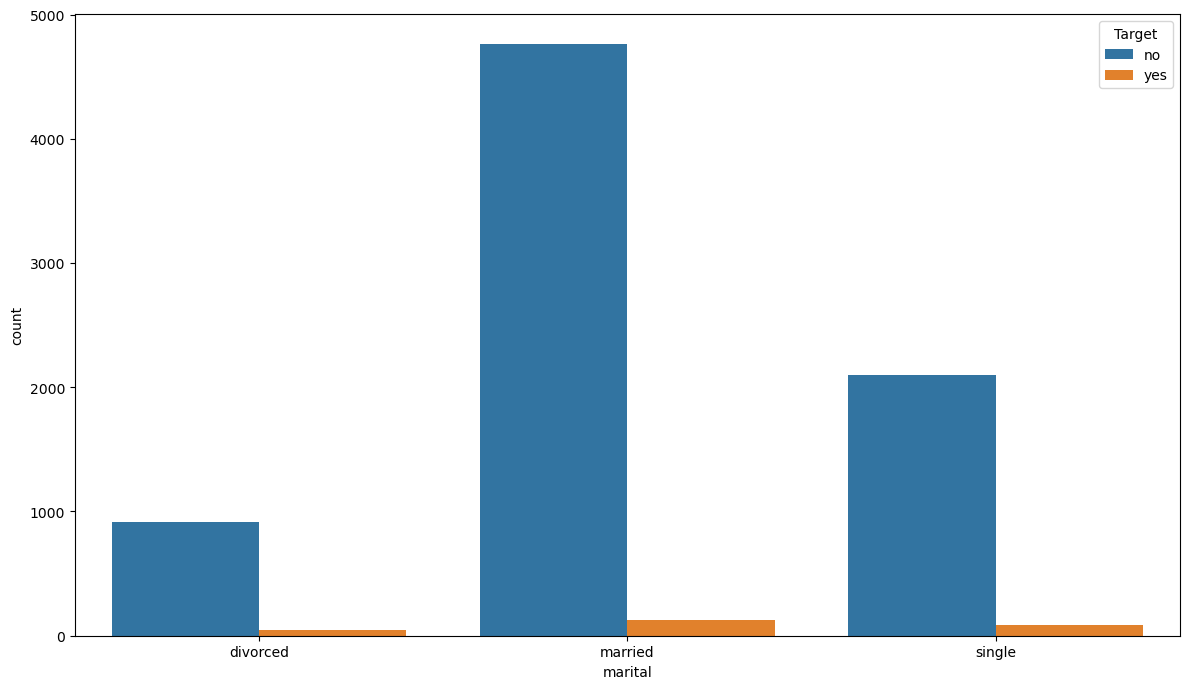

In [230]:
plt.figure(figsize=(12,7))
sns.countplot(data=df, x=df['marital'], hue='Target')
plt.tight_layout()

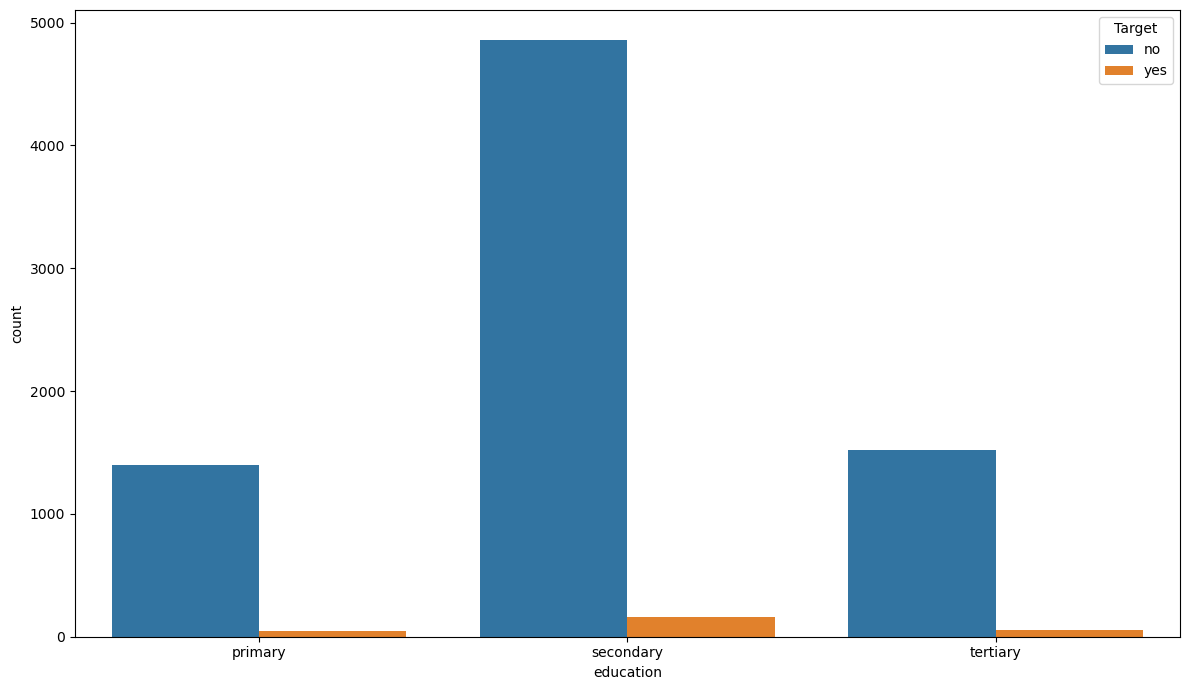

In [231]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x=df['education'], hue='Target')
plt.tight_layout()

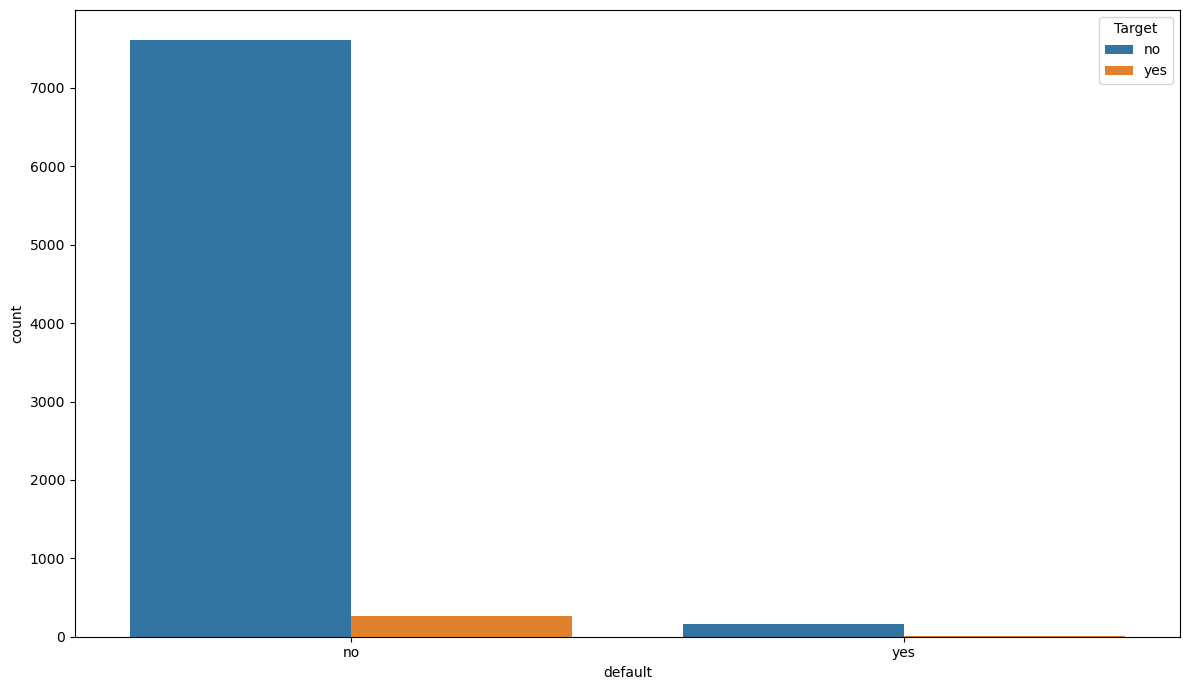

In [232]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x=df['default'], hue='Target')
plt.tight_layout()

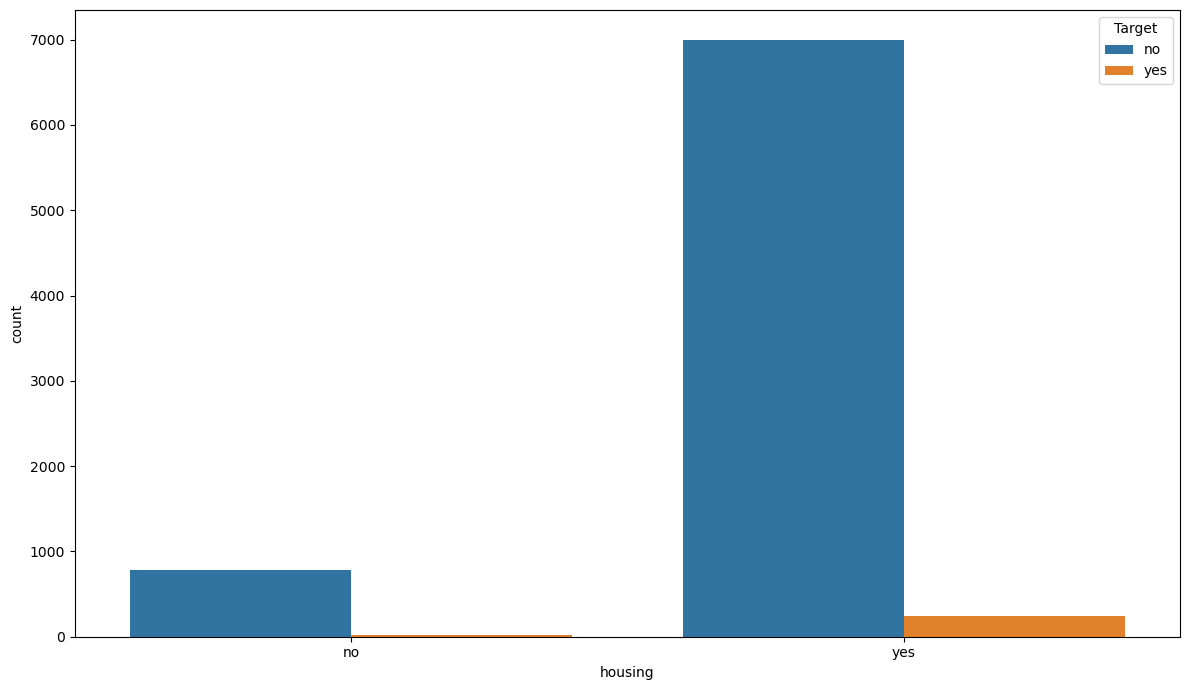

In [233]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x=df['housing'], hue='Target')
plt.tight_layout()

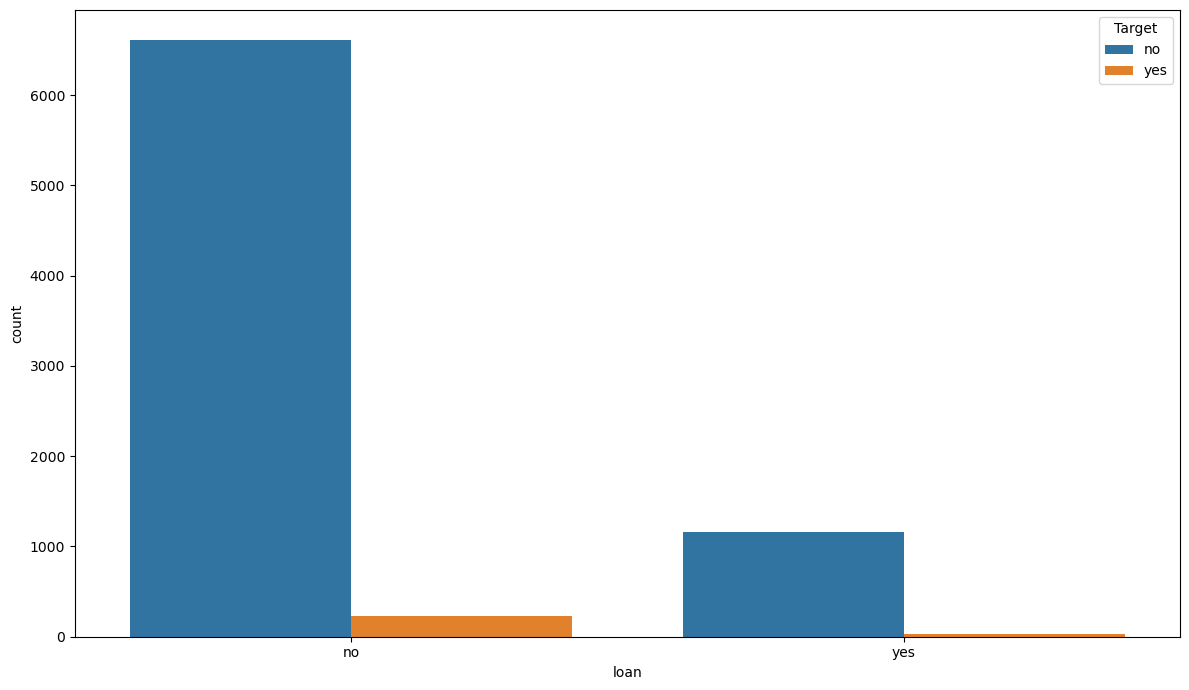

In [234]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x=df['loan'], hue='Target')
plt.tight_layout()

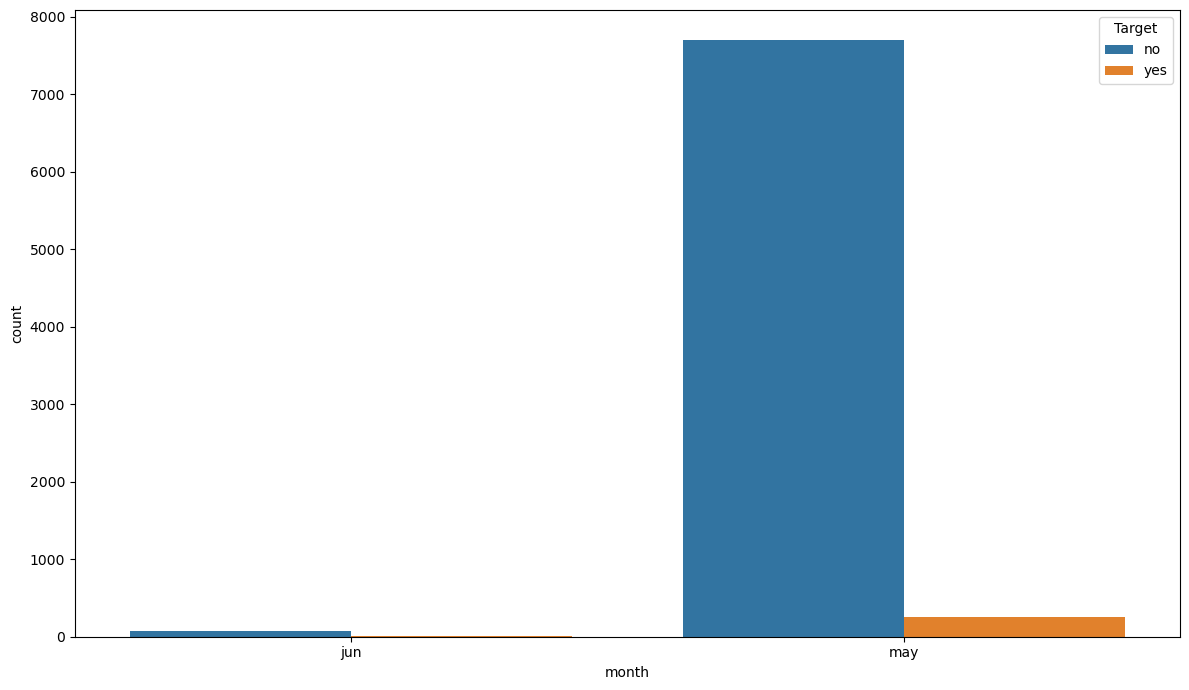

In [235]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x=df['month'], hue='Target')
plt.tight_layout()

# SECTION 2d: Histogram and Skewness

In [236]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.0,8040.0
mean,39.447388,650.312935,17.556343,105.610448,2.256095,-1.0,0.0
std,9.245378,879.235089,8.283841,23.968855,1.484996,0.0,0.0
min,20.000000,-1439.000000,2.000000,0.000000,1.000000,-1.0,0.0
25%,32.000000,40.000000,9.000000,116.500000,1.000000,-1.0,0.0
50%,38.000000,323.000000,16.000000,116.500000,2.000000,-1.0,0.0
75%,46.000000,1026.000000,26.000000,116.500000,3.000000,-1.0,0.0
max,61.000000,2505.000000,30.000000,116.500000,6.000000,-1.0,0.0


<Axes: xlabel='age', ylabel='Count'>

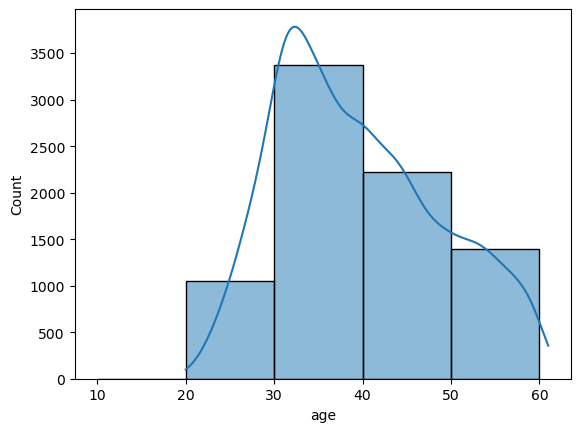

In [237]:
sns.histplot(data=df, x='age', bins=np.arange(10, 70, 10),kde=True)

In [238]:
print("Mean age is", round(df['age'].mean()))
print("Median age is", df['age'].median())
print("Maximum age is", df['age'].max())
print("Minimum age is", df['age'].min())

df['age'].skew()

Mean age is 39
Median age is 38.0
Maximum age is 61
Minimum age is 20


0.4054469583223972

# Comments:
# Age plot is positively skewed distribution, the tail of the histogram extends to the right. This indicates that the data is skewed towards higher values. The mean (average) is greater than the median (middle value).

<Axes: xlabel='balance', ylabel='Count'>

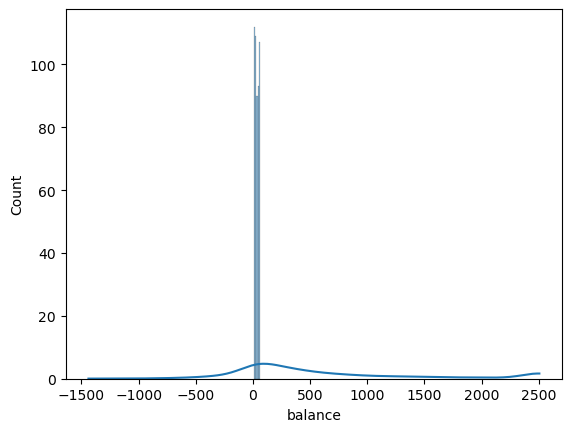

In [239]:
sns.histplot(data=df, x='balance', bins=np.arange(10, 70, 10), kde=True)

In [240]:
print("Mean balance is ", round(df['balance'].mean()))
print("Median balance is", df['balance'].median())
print("Maximum balance is", df['balance'].max())
print("Minimum balance is", df['balance'].min())

df['balance'].skew()

Mean balance is  650
Median balance is 323.0
Maximum balance is 2505.0
Minimum balance is -1439.0


0.9892386211021579

In [241]:
temp=np.cbrt(df['balance'])
temp.skew()
df['balance'] = temp

# Comments:
# Balance plot is positively skewed, the tail of the histogram extends to the right. This indicates that the data is skewed towards the higher values. The mean (average) is greater than the median (middle value).

<Axes: xlabel='day', ylabel='Count'>

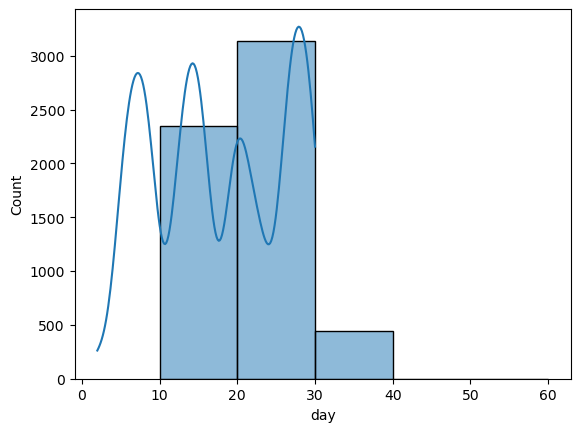

In [242]:
sns.histplot(data = df, x='day', bins=np.arange(10, 70, 10), kde=True)

In [243]:
print("Mean day is", round(df['day'].mean()))
print("Median day is ", df['day'].median())
print("Maximum day is", df['day'].max())
print("Minimum day is", df['day'].min())

df['day'].skew()

Mean day is 18
Median day is  16.0
Maximum day is 30
Minimum day is 2


-0.006746812268313815

# Comments:
# Day plot is negatively skewed distribution, the tail of the histogram extends to the left, meaning that the majority of the data points are concentrated on the right side of the histogram. This indicates that the data is skewed towards lower values. The mean is less than the median.

<Axes: xlabel='duration', ylabel='Count'>

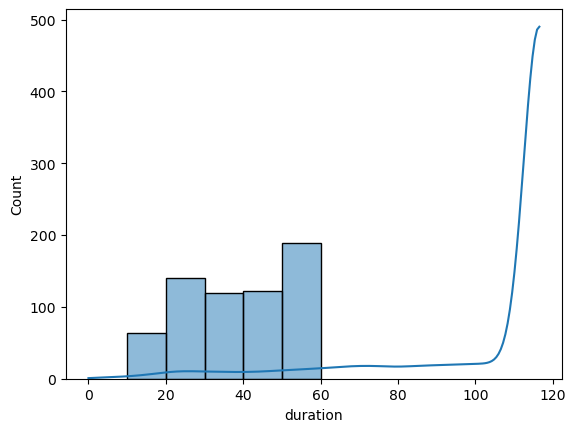

In [244]:
sns.histplot(data=df, x='duration', bins=np.arange(10, 70, 10), kde=True)

In [245]:
print("Mean duration is", round(df['duration'].mean()))
print("Meadian duration is", df['duration'].median())
print("Maximum duration is", df['duration'].max())
print("Minimum duration is", df['duration'].min())

df['duration'].skew()

Mean duration is 106
Meadian duration is 116.5
Maximum duration is 116.5
Minimum duration is 0.0


-2.3157293256822733

# Comments:
# Duration plot is negatively skewed distribution, the tail of the histogram extends to the left, meaning that the majority of the data points are concentrated to the right side of the histogram. This indicates that the data is skewed towards lower values. The mean is less than the median.

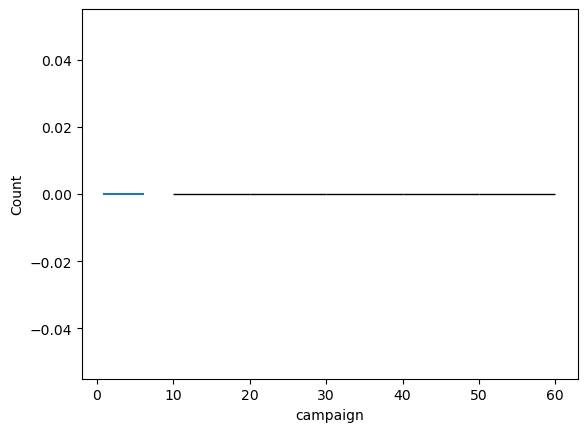

In [246]:
sns.histplot(data=df, x='campaign', bins=np.arange(10, 70, 10), kde=True)
campaign_log=np.log(df['campaign'] +1)
df['campaign']=campaign_log

In [247]:
print("Mean campaign is", round(df['campaign'].mean()))
print("Median campaign is", df['campaign'].mean())
print("Maximum campaign is", df['campaign'].max())
print("Minimum campaign is", df['campaign'].min())

df['campaign'].skew()

Mean campaign is 1
Median campaign is 1.0926545617726882
Maximum campaign is 1.9459101490553132
Minimum campaign is 0.6931471805599453


0.6598902645818443

<Axes: xlabel='pdays', ylabel='Count'>

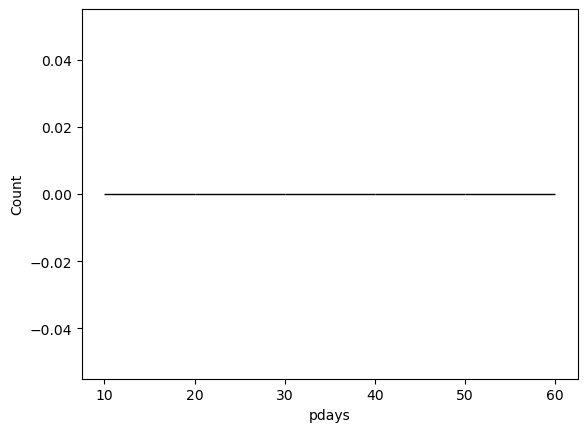

In [248]:
sns.histplot(data=df, x='pdays', bins=np.arange(10, 70, 10), kde=True)

In [249]:
print("Mean pdays is", round(df['pdays'].mean()))
print("Median pdays is", df['pdays'].median())
print("Maximum pdays is", df['pdays'].max())
print("Minimum pdays is", df['pdays'].min())

df['pdays'].skew()

Mean pdays is -1
Median pdays is -1.0
Maximum pdays is -1.0
Minimum pdays is -1.0


0

<Axes: xlabel='previous', ylabel='Count'>

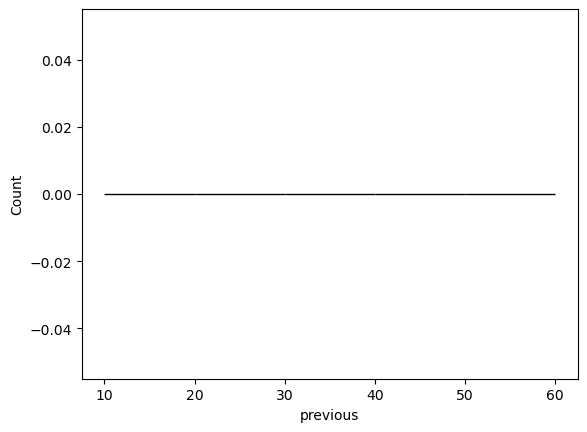

In [250]:
sns.histplot(data=df, x='previous', bins=np.arange(10, 70, 10), kde=True)

In [251]:
print("Mean previous is", round(df['previous'].mean()))
print("Median previous is", df['previous'].median())
print("Maximum previous is", df['previous'].max())
print("Minimu previous is", df['previous'].min())

df['previous'].skew()

Mean previous is 0
Median previous is 0.0
Maximum previous is 0.0
Minimu previous is 0.0


0

# SECTION 3a.) Scatter Plot

In [252]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.0,8040.0
mean,39.447388,5.897283,17.556343,105.610448,1.092655,-1.0,0.0
std,9.245378,5.924452,8.283841,23.968855,0.404074,0.0,0.0
min,20.000000,-11.289818,2.000000,0.000000,0.693147,-1.0,0.0
25%,32.000000,3.419952,9.000000,116.500000,0.693147,-1.0,0.0
50%,38.000000,6.861212,16.000000,116.500000,1.098612,-1.0,0.0
75%,46.000000,10.085926,26.000000,116.500000,1.386294,-1.0,0.0
max,61.000000,13.581130,30.000000,116.500000,1.945910,-1.0,0.0


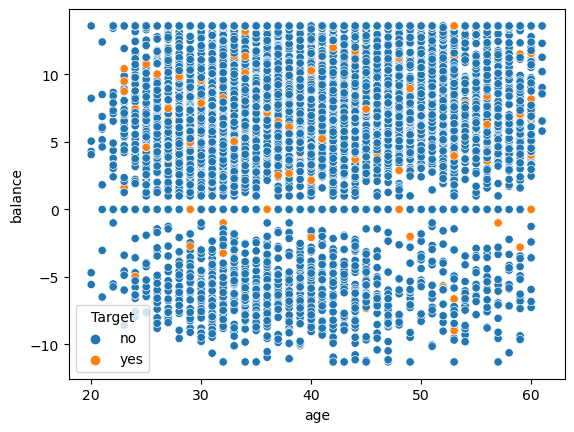

In [253]:
# Creating a scatter plot with a hue parameter
sns.scatterplot(data=df, x='age', y='balance', hue='Target')
plt.show()

# Observation: Any individual between the ages early 20s - 60s with a bank balance from +500 tp +2500 is likely to say yes to the fixed term deposit, provided they have money in their balance. Between the ages 20s and 40s there is a high concentration or opportunity to get 'Yes' response to the deposit as 20s individual are new and developing in their careers, 30s and 40s getting to the peak of their careers and marriages, increasing their balances.

# SECTION 3b.)

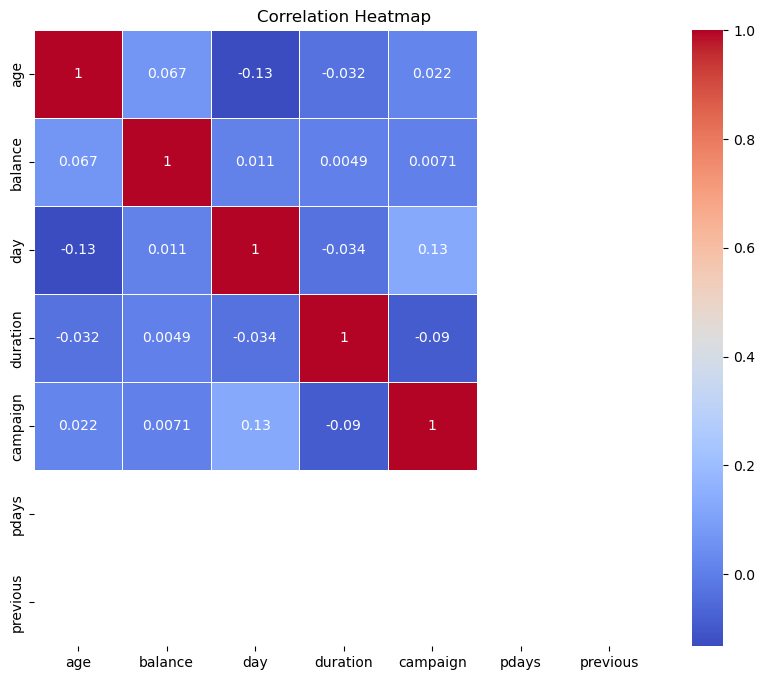

In [254]:
# Computing correlation among independent features
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

# SECTION 3c.): Scaling

In [255]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Creating a StandardScaler instance
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].to_numpy())
df_scaled
df_scaled1 = pd.DataFrame(df_scaled, columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])
df_scaled1

,age,balance,day,duration,campaign,pdays,previous
0,2.006815,1.180828,-1.515858,0.454349,-0.988759,0.0,0.0
1,0.492451,-0.476861,-1.515858,0.454349,-0.988759,0.0,0.0
2,-0.697407,-0.782798,-1.515858,-1.235449,-0.988759,0.0,0.0
3,0.816958,0.939403,-1.515858,-0.567874,-0.988759,0.0,0.0
4,-0.697407,-0.826674,-1.515858,0.454349,-0.988759,0.0,0.0
...,...,...,...,...,...,...,...
8035,-0.156562,1.297052,-1.878031,0.454349,-0.988759,0.0,0.0
8036,0.600620,0.544307,-1.878031,0.454349,0.014745,0.0,0.0
8037,-1.130082,-0.110701,-1.878031,-0.025470,0.726743,0.0,0.0
8038,-0.048393,0.629451,-1.878031,-3.321619,-0.988759,0.0,0.0


# SECTION 3d: Data Encoding

In [256]:
Categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'Target']

In [257]:
Categorical.remove('education')
Categorical

['job', 'marital', 'default', 'housing', 'loan', 'month', 'Target']

In [258]:
df_cat_en=pd.get_dummies(df[Categorical])
df_cat_en.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_jun',
       'month_may', 'Target_no', 'Target_yes'],
      dtype='object')

In [259]:
# Ordinal Encoding
print(df['education'].unique())
mapping = {'tertiary':2, 'secondary':1, 'primary':0}
edu_series = df["education"].map(mapping)
edu_df = pd.DataFrame(edu_series)
edu_df

['tertiary', 'secondary', 'primary']
Categories (3, object): ['primary', 'secondary', 'tertiary']


,education
0,2
1,1
2,1
3,1
4,1
...,...
8035,1
8036,1
8037,2
8038,1


In [260]:
#Combining converted categorical features with numerical values.
df_comb = pd.concat([df_scaled1, df_cat_en, edu_df], axis=1)
df_comb

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,month_jun,month_may,Target_no,Target_yes,education
0,2.006815,1.180828,-1.515858,0.454349,-0.988759,0.0,0.0,0,0,0,...,0,0,1,1,0,0,1,1,0,2
1,0.492451,-0.476861,-1.515858,0.454349,-0.988759,0.0,0.0,0,0,0,...,0,0,1,1,0,0,1,1,0,1
2,-0.697407,-0.782798,-1.515858,-1.235449,-0.988759,0.0,0.0,0,0,1,...,0,0,1,0,1,0,1,1,0,1
3,0.816958,0.939403,-1.515858,-0.567874,-0.988759,0.0,0.0,0,1,0,...,0,0,1,1,0,0,1,1,0,1
4,-0.697407,-0.826674,-1.515858,0.454349,-0.988759,0.0,0.0,0,1,0,...,0,1,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,-0.156562,1.297052,-1.878031,0.454349,-0.988759,0.0,0.0,0,0,1,...,0,0,1,1,0,1,0,1,0,1
8036,0.600620,0.544307,-1.878031,0.454349,0.014745,0.0,0.0,0,0,0,...,0,0,1,1,0,1,0,1,0,1
8037,-1.130082,-0.110701,-1.878031,-0.025470,0.726743,0.0,0.0,0,0,0,...,0,0,1,1,0,1,0,1,0,2
8038,-0.048393,0.629451,-1.878031,-3.321619,-0.988759,0.0,0.0,0,0,0,...,0,0,1,1,0,1,0,1,0,1


# Section 4: Correlation with target variable

In [261]:
x=df_comb.drop(['Target_yes','Target_no'], axis=1)
y=df_comb['Target_no']

In [262]:
corr_res = abs(x.corrwith(y, numeric_only=True))

In [263]:
selected_features = corr_res.sort_values(ascending = False).head(7).index.to_list()
selected_features

['duration',
 'marital_married',
 'balance',
 'marital_divorced',
 'day',
 'marital_single',
 'age']

# SECTION 5: Features Selection using SelectKBest

In [264]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initializing SelectKBest with the scoring function
selector = SelectKBest(score_func=f_classif, k=7)

# Fitting the selector to my data
x_new = selector.fit_transform(x, y)

# Getting the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Creating a DataFrame with the selected features
selected_features_df = x.iloc[:, selected_feature_indices]

# # Using target variable to the selected features DataFrame
# lected_features_df['Target_no'] = y

# Display the selected features DataFrame
print(selected_features_df.head())

        age   balance       day  duration  marital_divorced  marital_married  \
0  2.006815  1.180828 -1.515858  0.454349                 0                1   
1  0.492451 -0.476861 -1.515858  0.454349                 0                0   
2 -0.697407 -0.782798 -1.515858 -1.235449                 0                1   
3  0.816958  0.939403 -1.515858 -0.567874                 0                1   
4 -0.697407 -0.826674 -1.515858  0.454349                 0                0   

   marital_single  
0               0  
1               1  
2               0  
3               0  
4               1  


C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [5 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# Capstone Project 2:

# Problem Statement: Build machine learning models for prediction (Regression/Classification)

In [265]:
print("Given the type of outcome expected -'Yes' or 'No', the task to be performed is Classification")

Given the type of outcome expected -'Yes' or 'No', the task to be performed is Classification


In [266]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [267]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,12.892606,yes,no,5,may,116.5,0.693147,-1.0,0.0,no
1,44,technician,single,secondary,no,3.072317,yes,no,5,may,116.5,0.693147,-1.0,0.0,no
2,33,entrepreneur,married,secondary,no,1.259921,yes,yes,5,may,76.0,0.693147,-1.0,0.0,no
3,47,blue-collar,married,secondary,no,11.462385,yes,no,5,may,92.0,0.693147,-1.0,0.0,no
4,33,blue-collar,single,secondary,no,1.000000,no,no,5,may,116.5,0.693147,-1.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,38,entrepreneur,married,secondary,no,13.581130,yes,no,2,jun,116.5,0.693147,-1.0,0.0,no
8036,45,services,married,secondary,no,9.121801,yes,no,2,jun,116.5,1.098612,-1.0,0.0,no
8037,29,management,single,tertiary,no,5.241483,yes,no,2,jun,105.0,1.386294,-1.0,0.0,no
8038,39,services,divorced,secondary,no,9.626202,yes,no,2,jun,26.0,0.693147,-1.0,0.0,no


In [268]:
df_comb.describe()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,month_jun,month_may,Target_no,Target_yes
count,8.040000e+03,8.040000e+03,8.040000e+03,8.040000e+03,8.040000e+03,8040.0,8040.0,8040.000000,8040.000000,8040.000000,...,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,-3.110834e-16,-2.121023e-17,-1.131212e-16,1.908921e-16,-1.838220e-16,0.0,0.0,0.122761,0.333831,0.029726,...,0.979104,0.020896,0.099129,0.900871,0.851244,0.148756,0.010323,0.989677,0.967413,0.032587
std,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,0.0,0.0,0.328183,0.471609,0.169842,...,0.143044,0.143044,0.298854,0.298854,0.355870,0.355870,0.101085,0.101085,0.177564,0.177564
min,-2.103602e+00,-2.901225e+00,-1.878031e+00,-4.406427e+00,-9.887590e-01,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.055756e-01,-4.181797e-01,-1.032960e+00,4.543492e-01,-9.887590e-01,0.0,0.0,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,-1.565623e-01,1.627135e-01,-1.878887e-01,4.543492e-01,1.474505e-02,0.0,0.0,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,7.087887e-01,7.070533e-01,1.019356e+00,4.543492e-01,7.267425e-01,0.0,0.0,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.331322e+00,1.297052e+00,1.502254e+00,4.543492e-01,2.111761e+00,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [270]:
df_comb

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,month_jun,month_may,Target_no,Target_yes,education
0,2.006815,1.180828,-1.515858,0.454349,-0.988759,0.0,0.0,0,0,0,...,0,0,1,1,0,0,1,1,0,2
1,0.492451,-0.476861,-1.515858,0.454349,-0.988759,0.0,0.0,0,0,0,...,0,0,1,1,0,0,1,1,0,1
2,-0.697407,-0.782798,-1.515858,-1.235449,-0.988759,0.0,0.0,0,0,1,...,0,0,1,0,1,0,1,1,0,1
3,0.816958,0.939403,-1.515858,-0.567874,-0.988759,0.0,0.0,0,1,0,...,0,0,1,1,0,0,1,1,0,1
4,-0.697407,-0.826674,-1.515858,0.454349,-0.988759,0.0,0.0,0,1,0,...,0,1,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,-0.156562,1.297052,-1.878031,0.454349,-0.988759,0.0,0.0,0,0,1,...,0,0,1,1,0,1,0,1,0,1
8036,0.600620,0.544307,-1.878031,0.454349,0.014745,0.0,0.0,0,0,0,...,0,0,1,1,0,1,0,1,0,1
8037,-1.130082,-0.110701,-1.878031,-0.025470,0.726743,0.0,0.0,0,0,0,...,0,0,1,1,0,1,0,1,0,2
8038,-0.048393,0.629451,-1.878031,-3.321619,-0.988759,0.0,0.0,0,0,0,...,0,0,1,1,0,1,0,1,0,1


In [271]:
print(df_comb)

           age   balance       day  duration  campaign  pdays  previous  \
0     2.006815  1.180828 -1.515858  0.454349 -0.988759    0.0       0.0   
1     0.492451 -0.476861 -1.515858  0.454349 -0.988759    0.0       0.0   
2    -0.697407 -0.782798 -1.515858 -1.235449 -0.988759    0.0       0.0   
3     0.816958  0.939403 -1.515858 -0.567874 -0.988759    0.0       0.0   
4    -0.697407 -0.826674 -1.515858  0.454349 -0.988759    0.0       0.0   
...        ...       ...       ...       ...       ...    ...       ...   
8035 -0.156562  1.297052 -1.878031  0.454349 -0.988759    0.0       0.0   
8036  0.600620  0.544307 -1.878031  0.454349  0.014745    0.0       0.0   
8037 -1.130082 -0.110701 -1.878031 -0.025470  0.726743    0.0       0.0   
8038 -0.048393  0.629451 -1.878031 -3.321619 -0.988759    0.0       0.0   
8039 -0.805576 -0.189131 -1.878031  0.454349  2.111761    0.0       0.0   

      job_admin.  job_blue-collar  job_entrepreneur  ...  default_yes  \
0              0          

In [272]:
# Model: Logistic Regression
logistic_regression_model = LogisticRegression()

In [273]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [274]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,38,4,1,2,0,2140,1,0,1,1,115,0,0,0,0
1,24,9,2,1,0,566,1,0,1,1,115,0,0,0,0
2,13,2,1,1,0,539,1,1,1,1,74,0,0,0,0
3,27,1,1,1,0,1836,1,0,1,1,90,0,0,0,0
4,13,1,2,1,0,538,0,0,1,1,115,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,18,2,1,1,0,2253,1,0,0,0,115,0,0,0,0
8036,25,7,1,1,0,1284,1,0,0,0,115,1,0,0,0
8037,9,4,2,2,0,681,1,0,0,0,103,2,0,0,0
8038,19,7,0,1,0,1405,1,0,0,0,24,0,0,0,0


In [275]:
# Model: Logistic Regression
logistic_regression_model = LogisticRegression()

In [276]:
X = df.drop('Target', axis=1)
y = df['Target']

In [277]:
X

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,38,4,1,2,0,2140,1,0,1,1,115,0,0,0
1,24,9,2,1,0,566,1,0,1,1,115,0,0,0
2,13,2,1,1,0,539,1,1,1,1,74,0,0,0
3,27,1,1,1,0,1836,1,0,1,1,90,0,0,0
4,13,1,2,1,0,538,0,0,1,1,115,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,18,2,1,1,0,2253,1,0,0,0,115,0,0,0
8036,25,7,1,1,0,1284,1,0,0,0,115,1,0,0
8037,9,4,2,2,0,681,1,0,0,0,103,2,0,0
8038,19,7,0,1,0,1405,1,0,0,0,24,0,0,0


In [278]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8035    0
8036    0
8037    0
8038    0
8039    0
Name: Target, Length: 8040, dtype: int32

# PART 1

Perform the steps below to build any 5 machine learning models to perform regression or classification tasks considering the dataset.
1.
Data Splitting – Split the data into training and testing datasets.
2.
Build the model using training dataset
3.
Make predictions using the built model on test dataset.
4.
Evaluate model using appropriate evaluation metrics.

# 1.) Data Splitting

In [279]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [281]:
from sklearn.linear_model import LogisticRegression

# 1.) Logistic Regression model
model = LogisticRegression()

In [282]:
# Train the model
model.fit(X_train, y_train)

C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [283]:
# Make predictions
y_pred = model.predict(X_test)

In [284]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [285]:
from sklearn.tree import DecisionTreeClassifier

# 2.) Decision Tree Classifier model
model = DecisionTreeClassifier()

In [286]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [287]:
# Make predictions
y_pred = model.predict(X_test)

In [288]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [289]:
from sklearn.ensemble import RandomForestClassifier

# 3.) Random Forest Classifier model
model = RandomForestClassifier()

In [290]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [291]:
# Make predictions
y_pred = model.predict(X_test)

In [292]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [293]:
from sklearn.svm import SVC

# 4.) SVM Classifier model
model = SVC()

In [294]:
# Train the model
model.fit(X_train, y_train)

SVC()

In [295]:
# Make predictions
y_pred = model.predict(X_test)

In [296]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [297]:
from sklearn.neighbors import KNeighborsClassifier

# 5.) KNN Classifier model
model = KNeighborsClassifier()

In [298]:
# Train the model
model.fit(X_train, y_train)

KNeighborsClassifier()

In [299]:
# Make predictions
y_pred = model.predict(X_test)

In [300]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Models Evaluation

In [301]:
# 1.) Accuracy Metrics

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9633084577114428


In [302]:
# 2.) Precision Metrics

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.0


In [303]:
# 3.) Recall

from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.0


In [304]:
# 4.) F1 Score

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.0


In [305]:
# 5.) Confusion Matrix

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1549    1]
 [  58    0]]


# Compare Accuracy

In [306]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [307]:
# Define models as a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "SVM Classifier": SVC(),
    "KNN Classifier": KNeighborsClassifier()
}

In [308]:
# Train and evaluate each model
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [309]:
# Print accuracies
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy}")

Logistic Regression: 0.9639303482587065
Decision Tree Classifier: 0.9322139303482587
Random Forest Classifier: 0.9639303482587065
SVM Classifier: 0.9639303482587065
KNN Classifier: 0.9633084577114428


In [310]:
print("Based on the above accuracies results, three models; Logistic Regression, Random Forest Classifier, and SVM Classifier achieved the highest accuracy of 0.9639303482587065")

Based on the above accuracies results, three models; Logistic Regression, Random Forest Classifier, and SVM Classifier achieved the highest accuracy of 0.9639303482587065


In [311]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x= st_x.fit_transform(x)

In [312]:
models=[] # model[] is empty
scores=[] #scores[] is empty

# GridSearchCV- LogisticRegression

In [313]:
parameters = {'penalty':['l1', 'l2']}
logistic_regression_model = LogisticRegression()
grid = GridSearchCV(logistic_regression_model, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(logistic_regression_model)
scores.append(grid.best_score_)

{'penalty': 'l2'}
LogisticRegression()
0.967412935323383


C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_so

# GrdidSearchCV- DecisionTreeClassifier

In [314]:
parameters = {'criterion':['gini', 'entropy'],
'splitter':['best', 'random']
}
c2 = DecisionTreeClassifier()
grid = GridSearchCV(c2, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c2)
scores.append(grid.best_score_)

{'criterion': 'gini', 'splitter': 'random'}
DecisionTreeClassifier(splitter='random')
0.8687810945273631


# GridSearchCV- Support Vector Classifier(SVC)

In [315]:
parameters = {'C': [0.01, 0.05],
                'degree': [2, 3],
                'gamma':[0.001, 0.01],
                'kernel': ['rbf']
                }
c3 = SVC()
grid = GridSearchCV(c3, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c3)
scores.append(grid.best_score_)

{'C': 0.01, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=0.01, degree=2, gamma=0.001)
0.967412935323383


# GridSearchCVKNeighborsClassifier(KNN)

In [316]:
parameters = {'n_neighbors': range(30),
'metric':['manhattan','euclidean']}

c4 = KNeighborsClassifier()
grid = GridSearchCV(c4, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
models.append(c4)
scores.append(grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 6}
KNeighborsClassifier(metric='manhattan', n_neighbors=6)
0.967412935323383


C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File 

# GridSearchCV- RandomForestClassifier

In [317]:
parameters = {'n_estimators':range(20),
'criterion':['gini','entropy']}
c5 = RandomForestClassifier()
grid = GridSearchCV(c5, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c5)
scores.append(grid.best_score_)

{'criterion': 'entropy', 'n_estimators': 16}
RandomForestClassifier(criterion='entropy', n_estimators=16)
0.9582089552238806


C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users

In [318]:
result_data=pd.DataFrame({"Models":models,"Score":scores})

In [319]:
print(result_data)

                     Models     Score
0      LogisticRegression()  0.967413
1  DecisionTreeClassifier()  0.868781
2                     SVC()  0.967413
3    KNeighborsClassifier()  0.967413
4  RandomForestClassifier()  0.958209


# PART 2 (2) Apply hyperparameter tuning using GridSearchCV for all the models.

In [320]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [321]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

In [322]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [323]:
# Define models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC": SVC(),
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}

# Define hyperparameters for each model
params = {
    "RandomForestClassifier": {
        "n_estimators": [10, 50, 100],
        "max_depth": [None, 5, 10]
    },
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "LogisticRegression": {
        "C": [0.1, 1, 10],
        "penalty": ["l1", "l2"]
    },
    "DecisionTreeClassifier": {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
    },
    "KNeighborsClassifier": {
    "n_neighbors": [3, 5, 7],
    "weights": ['uniform', 'distance'],
    "metric": ['euclidean', 'manhattan']
    }
}

In [324]:
# Perform grid search cross-validation for each model
for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    clf = GridSearchCV(estimator=model, param_grid=params[model_name], cv=5)
    clf.fit(X_train, y_train)

Performing GridSearchCV for RandomForestClassifier...
Performing GridSearchCV for SVC...
Performing GridSearchCV for LogisticRegression...


C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Performing GridSearchCV for DecisionTreeClassifier...
Performing GridSearchCV for KNeighborsClassifier...


In [325]:
 # Print the best parameters and the corresponding score
print(f"Best parameters for {model_name}: {clf.best_params_}")
print(f"Best score for {model_name}: {clf.best_score_}\n")

Best parameters for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best score for KNeighborsClassifier: 0.9583333333333334



In [326]:
 # Evaluate the model on the test set
test_score = clf.score(X_test, y_test)
print(f"Test score for {model_name}: {test_score}\n")

Test score for KNeighborsClassifier: 1.0



# PART 2(2) Create a dataframe to store the result of GridSearchCV for all the models which will includes model_name, best_score_ and best_params_

In [327]:
# Perform GridSearchCV for each model
for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    clf = GridSearchCV(estimator=model, param_grid=params[model_name], cv=5)
    clf.fit(X_train, y_train)

Performing GridSearchCV for RandomForestClassifier...
Performing GridSearchCV for SVC...
Performing GridSearchCV for LogisticRegression...


C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Performing GridSearchCV for DecisionTreeClassifier...
Performing GridSearchCV for KNeighborsClassifier...


In [328]:
 # Store results in a dictionary
result_dict = {
    "model_name": model_name,
    "best_score_": clf.best_score_,
    "best_params_": clf.best_params_
    }
    
results.append(result_dict)

In [329]:
# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

In [330]:
# Display the DataFrame
print(results_df)

             model_name  best_score_  \
0  KNeighborsClassifier     0.958333   
1  KNeighborsClassifier     0.958333   
2  KNeighborsClassifier     0.958333   

                                        best_params_  
0  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...  
1  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...  
2  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...  
